In [128]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["C:/Users/kwon3/AppData/Local/Microsoft/Windows/Fonts/NanumGothicBold.ttf"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [129]:
# from google.colab import drive
# drive.mount('/content/drive')

- 데이터 경로 변수

In [130]:
# DATA_PATH = "/content/drive/MyDrive/파이널프로젝트/data/"
# DATA_PATH

In [131]:
DATA_PATH = "data/"
DATA_PATH

'data/'

- 시드값

In [132]:
SEED = 42

- 데이터 불러오기

In [133]:
import pandas as pd
import numpy as np

train_tr = pd.read_csv(f"{DATA_PATH}store_train_transactions.csv") # 학습용 구매기록 데이터
train_target = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 정답 데이터
test_tr = pd.read_csv(f"{DATA_PATH}store_test_transactions.csv") # 테스트용 구매기록 데이터
submit = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 제출 양식 데이터

train_tr.shape , train_target.shape , test_tr.shape , submit.shape

((523105, 7), (14940, 2), (441196, 7), (12225, 2))

- 공통 피처 파일 불러오기

In [134]:
train_ft = pd.read_csv(f"{DATA_PATH}train_common.csv") # 학습 데이터(피처)
test_ft = pd.read_csv(f"{DATA_PATH}test_common.csv") # 테스트 데이터(피처)

train_ft.shape , test_ft.shape

((14940, 4409), (12225, 4409))

- 정답 데이터

In [135]:
target = train_target["target"]
target

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
14935    0.0
14936    0.0
14937    0.0
14938    1.0
14939    1.0
Name: target, Length: 14940, dtype: float64

# 결측치 처리

In [136]:
mask = train_ft.isnull().sum() > 0
train_ft.isnull().sum()[mask]

Series([], dtype: int64)

In [137]:
mask = test_ft.isnull().sum() > 0
test_ft.isnull().sum()[mask]

Series([], dtype: int64)

# 특성 공학(Feature Engineering)

- ID 변수 제외

In [138]:
train_ft = train_ft.iloc[:,1:]
test_ft = test_ft.iloc[:,1:]
train_ft.shape, test_ft.shape

((14940, 4408), (12225, 4408))

- 추가 피처 만들어 보기

In [139]:
cols = [ col for col in train_ft.columns if col.startswith("지점코드_구매횟수_") ]

train_ft["지점코드별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["지점코드별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["지점코드별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["지점코드별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["지점코드별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["지점코드별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4411), (12225, 4411))

In [140]:
cols = [ col for col in train_ft.columns if col.startswith("지점코드_구매합계_") ]

train_ft["지점코드별_구매합계_std"] = train_ft[cols].std(axis=1)
train_ft["지점코드별_구매합계_skew"] = train_ft[cols].skew(axis=1)
train_ft["지점코드별_구매합계_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["지점코드별_구매합계_std"] = test_ft[cols].std(axis=1)
test_ft["지점코드별_구매합계_skew"] = test_ft[cols].skew(axis=1)
test_ft["지점코드별_구매합계_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4414), (12225, 4414))

In [141]:
cols = [ col for col in train_ft.columns if col.startswith("중분류_구매횟수_") ]

train_ft["중분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["중분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["중분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["중분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["중분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["중분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4417), (12225, 4417))

In [142]:
cols = [ col for col in train_ft.columns if col.startswith("중분류_구매합계_") ]

train_ft["중분류별_구매합계_std"] = train_ft[cols].std(axis=1)
train_ft["중분류별_구매합계_skew"] = train_ft[cols].skew(axis=1)
train_ft["중분류별_구매합계_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["중분류별_구매합계_std"] = test_ft[cols].std(axis=1)
test_ft["중분류별_구매합계_skew"] = test_ft[cols].skew(axis=1)
test_ft["중분류별_구매합계_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4420), (12225, 4420))

In [143]:
cols = [ col for col in train_ft.columns if col.startswith("대분류_구매횟수_") ]

train_ft["대분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["대분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["대분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["대분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["대분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["대분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4423), (12225, 4423))

In [144]:
cols = [ col for col in train_ft.columns if col.startswith("대분류_구매합계_") ]

train_ft["대분류별_구매합계_std"] = train_ft[cols].std(axis=1)
train_ft["대분류별_구매합계_skew"] = train_ft[cols].skew(axis=1)
train_ft["대분류별_구매합계_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["대분류별_구매합계_std"] = test_ft[cols].std(axis=1)
test_ft["대분류별_구매합계_skew"] = test_ft[cols].skew(axis=1)
test_ft["대분류별_구매합계_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4426), (12225, 4426))

In [145]:
cols = [ col for col in train_ft.columns if col.startswith("브랜드코드_구매횟수_") ]

train_ft["브랜드코드별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["브랜드코드별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["브랜드코드별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["브랜드코드별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["브랜드코드별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["브랜드코드별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4429), (12225, 4429))

In [146]:
cols = [ col for col in train_ft.columns if col.startswith("브랜드코드_구매합계_") ]

train_ft["브랜드코드별_구매합계_std"] = train_ft[cols].std(axis=1)
train_ft["브랜드코드별_구매합계_skew"] = train_ft[cols].skew(axis=1)
train_ft["브랜드코드별_구매합계_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["브랜드코드별_구매합계_std"] = test_ft[cols].std(axis=1)
test_ft["브랜드코드별_구매합계_skew"] = test_ft[cols].skew(axis=1)
test_ft["브랜드코드별_구매합계_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4432), (12225, 4432))

In [147]:
cols = [ col for col in train_ft.columns if col.endswith("요일_구매비율") ]

train_ft["요일별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["요일별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["요일별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["요일별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["요일별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["요일별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4435), (12225, 4435))

In [148]:
# cols = [ col for col in train_ft.columns if col.endswith("월_구매비율") ]

# train_ft["월별_구매비율_std"] = train_ft[cols].std(axis=1)
# train_ft["월별_구매비율_skew"] = train_ft[cols].skew(axis=1)
# train_ft["월별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["월별_구매비율_std"] = test_ft[cols].std(axis=1)
# test_ft["월별_구매비율_skew"] = test_ft[cols].skew(axis=1)
# test_ft["월별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

In [149]:
cols = ["봄_구매비율","여름_구매비율","가을_구매비율","겨울_구매비율"]

train_ft["계절별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["계절별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["계절별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["계절별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["계절별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["계절별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4438), (12225, 4438))

In [150]:
# cols = [ col for col in train_ft.columns if col.endswith("분기_구매비율") ]

# train_ft["분기별_구매비율_std"] = train_ft[cols].std(axis=1)
# train_ft["분기별_구매비율_skew"] = train_ft[cols].skew(axis=1)
# train_ft["분기별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["분기별_구매비율_std"] = test_ft[cols].std(axis=1)
# test_ft["분기별_구매비율_skew"] = test_ft[cols].skew(axis=1)
# test_ft["분기별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

In [151]:
# cols = [ col for col in train_ft.columns if col.endswith("년_구매비율") ]

# train_ft["년도별_구매비율_std"] = train_ft[cols].std(axis=1)
# test_ft["년도별_구매비율_std"] = test_ft[cols].std(axis=1)

# train_ft.shape, test_ft.shape

In [152]:
# train_ft["첫구매날짜"] = pd.to_datetime(train_ft["첫구매날짜"])
# train_ft["마지막구매날짜"] = pd.to_datetime(train_ft["마지막구매날짜"])
# test_ft["첫구매날짜"] = pd.to_datetime(test_ft["첫구매날짜"])
# test_ft["마지막구매날짜"] = pd.to_datetime(test_ft["마지막구매날짜"])

# train_ft["첫구매년도"] = train_ft["첫구매날짜"].dt.year
# train_ft["첫구매월"] = train_ft["첫구매날짜"].dt.month
# train_ft["마지막구매년도"] = train_ft["마지막구매날짜"].dt.year
# train_ft["마지막구매월"] = train_ft["마지막구매날짜"].dt.month

# test_ft["첫구매년도"] = test_ft["첫구매날짜"].dt.year
# test_ft["첫구매월"] = test_ft["첫구매날짜"].dt.month
# test_ft["마지막구매년도"] = test_ft["마지막구매날짜"].dt.year
# test_ft["마지막구매월"] = test_ft["마지막구매날짜"].dt.month

# train_ft.shape, test_ft.shape

In [153]:
cols_지점 = [col for col in train_ft.columns if col.startswith("지점코드_구매횟수_")]
cols_중분류 = [col for col in train_ft.columns if col.startswith("중분류_구매횟수_")]
cols_대분류 = [col for col in train_ft.columns if col.startswith("대분류_구매횟수_")]

train_ft["구매집중도_지점"] = train_ft[cols_지점].max(axis=1) / train_ft[cols_지점].sum(axis=1)
train_ft["구매집중도_중분류"] = train_ft[cols_중분류].max(axis=1) / train_ft[cols_중분류].sum(axis=1)
train_ft["구매집중도_대분류"] = train_ft[cols_대분류].max(axis=1) / train_ft[cols_대분류].sum(axis=1)

test_ft["구매집중도_지점"] = test_ft[cols_지점].max(axis=1) / test_ft[cols_지점].sum(axis=1)
test_ft["구매집중도_중분류"] = test_ft[cols_중분류].max(axis=1) / test_ft[cols_중분류].sum(axis=1)
test_ft["구매집중도_대분류"] = test_ft[cols_대분류].max(axis=1) / test_ft[cols_대분류].sum(axis=1)

train_ft.shape, test_ft.shape

((14940, 4441), (12225, 4441))

## Feature Encoding

- 범주형 피처
    - 주구매지점, 주구매_중분류, 주구매_대분류, 선호브랜드코드, 고객등급

In [154]:
# %pip install category_encoders

In [155]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

oh_enc = OneHotEncoder(handle_unknown="ignore")
oh_enc_cols = ["고객등급"]
oh_enc_data = pd.concat([train_ft[oh_enc_cols], test_ft[oh_enc_cols]])
oh_enc.fit(oh_enc_data)

train_ft[oh_enc.get_feature_names_out()] = oh_enc.transform(train_ft[oh_enc_cols]).toarray()
test_ft[oh_enc.get_feature_names_out()] = oh_enc.transform(test_ft[oh_enc_cols]).toarray()

train_ft.shape, test_ft.shape

((14940, 4446), (12225, 4446))

In [156]:
train_ft['선호브랜드코드'] = train_ft['선호브랜드코드'].astype('category')
test_ft['선호브랜드코드'] = test_ft['선호브랜드코드'].astype('category')

combined_brands = pd.concat([train_ft['선호브랜드코드'], test_ft['선호브랜드코드']])

enc = ce.CountEncoder()
train_ft["선호브랜드코드_cnt"] = enc.fit_transform(train_ft[['선호브랜드코드']])
test_ft["선호브랜드코드_cnt"] = enc.transform(test_ft[['선호브랜드코드']])

train_ft.drop(columns=["선호브랜드코드"], inplace=True)
test_ft.drop(columns=["선호브랜드코드"], inplace=True)

train_ft.shape, test_ft.shape

((14940, 4446), (12225, 4446))

- 문자열 피처 삭제

In [157]:
cols = train_ft.select_dtypes(["object", "datetime"]).columns.tolist()
cols

['주구매_중분류', '주구매_대분류', '고객등급']

In [158]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)
train_ft.shape, test_ft.shape

((14940, 4443), (12225, 4443))

In [159]:
train_ft.select_dtypes("object").columns , test_ft.select_dtypes("object").columns

(Index([], dtype='object'), Index([], dtype='object'))

In [160]:
train_ft.select_dtypes("datetime").columns, test_ft.select_dtypes("datetime").columns

(Index([], dtype='object'), Index([], dtype='object'))

## Feature Scaling

In [161]:
train_ft.isin([np.inf, -np.inf]).any().sum(), test_ft.isin([np.inf, -np.inf]).any().sum()

(0, 0)

In [162]:
train_ft.isna().sum().sum(), test_ft.isna().sum().sum()

(0, 0)

In [163]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, Normalizer
scaler = RobustScaler()

train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)
train_ft.head()

,총방문일수,백화점이용기간,구매주기,일별평균구매건수,구매간격_표준편차,평균구매요일,주구매요일,월요일_구매비율,화요일_구매비율,수요일_구매비율,...,계절별_구매비율_kurt,구매집중도_지점,구매집중도_중분류,구매집중도_대분류,고객등급_Black,고객등급_Diamond,고객등급_Gold,고객등급_Normal,고객등급_Platinum,선호브랜드코드_cnt
0,-0.117647,-0.354610,0.45,-0.089744,0.259112,0.000000,-0.5,-0.110779,-0.533333,1.111111,...,0.465423,-2.049399,-0.098901,-0.678867,0.0,0.0,0.0,0.0,0.0,-0.082664
1,0.588235,0.333333,-0.15,0.576923,-0.296481,-0.787061,0.0,-0.246177,0.863492,0.444444,...,-1.475901,-1.216066,-0.527473,-0.462416,0.0,0.0,0.0,0.0,0.0,0.929104
2,2.588235,0.361702,-0.65,0.358741,-0.635681,-0.759921,-1.5,0.932575,0.460131,0.039216,...,0.297042,-0.396738,-0.561086,-0.494247,0.0,1.0,0.0,-1.0,0.0,-0.081659
3,4.647059,0.283688,-0.80,0.660256,-0.730731,0.092423,0.5,-0.086628,0.072072,0.251652,...,0.644201,-0.852488,-0.119751,-0.350681,0.0,1.0,0.0,-1.0,0.0,-0.051952
4,0.764706,0.056738,-0.30,-0.173077,-0.285193,0.981564,0.5,-0.043081,-0.237037,-0.166667,...,-0.682457,-0.462098,-0.217949,-0.516529,0.0,0.0,0.0,0.0,0.0,0.929104


# 차원축소

- 분산 임계값이 0인 경우 제외

In [164]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0)
train_vt = pd.DataFrame(
    vt.fit_transform(train_ft),
    columns=train_ft.columns[vt.get_support()],
    index=train_ft.index
)

test_vt = pd.DataFrame(
    vt.transform(test_ft), 
    columns=train_ft.columns[vt.get_support()],
    index=test_ft.index
)

train_vt.shape, test_vt.shape

((14940, 4443), (12225, 4443))

In [165]:
cols = [
    "환불후재구매브랜드_count",
    # "야간구매비율",
    # "주구매지점_이용비율",
    "브랜드코드_nunique",
    "방문일수_대비_구매건수",
]
train_vt.drop(columns=cols, inplace=True)
test_vt.drop(columns=cols, inplace=True)
train_vt.shape, test_vt.shape

((14940, 4440), (12225, 4440))

- 특성 간 상관관계 80% 이상인 경우 제거

In [125]:
# corr = train_vt.corr().abs()
# upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
# to_drop = [col for col in upper.columns if any(upper[col] >= 0.9)]

# train_vt.drop(columns=to_drop, inplace=True)
# test_vt.drop(columns=to_drop, inplace=True)
# train_vt.shape, test_vt.shape

((14940, 3723), (12225, 3723))

In [126]:
# train_vt.to_csv(f"{DATA_PATH}train_corr.csv",index=False)
# test_vt.to_csv(f"{DATA_PATH}test_corr.csv",index=False)

- 훈련/검증 데이터 분리

In [39]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(
#     train_vt, target, test_size=0.2, random_state=SEED
# )

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
model = LGBMClassifier(random_state=SEED)
model.fit(train_vt, target)

scores = cross_val_score(model, train_vt, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores)

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135104
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 3072
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


0.7237287405936195

- XAI 활용

c:\Users\kwon3\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135104
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 3072
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


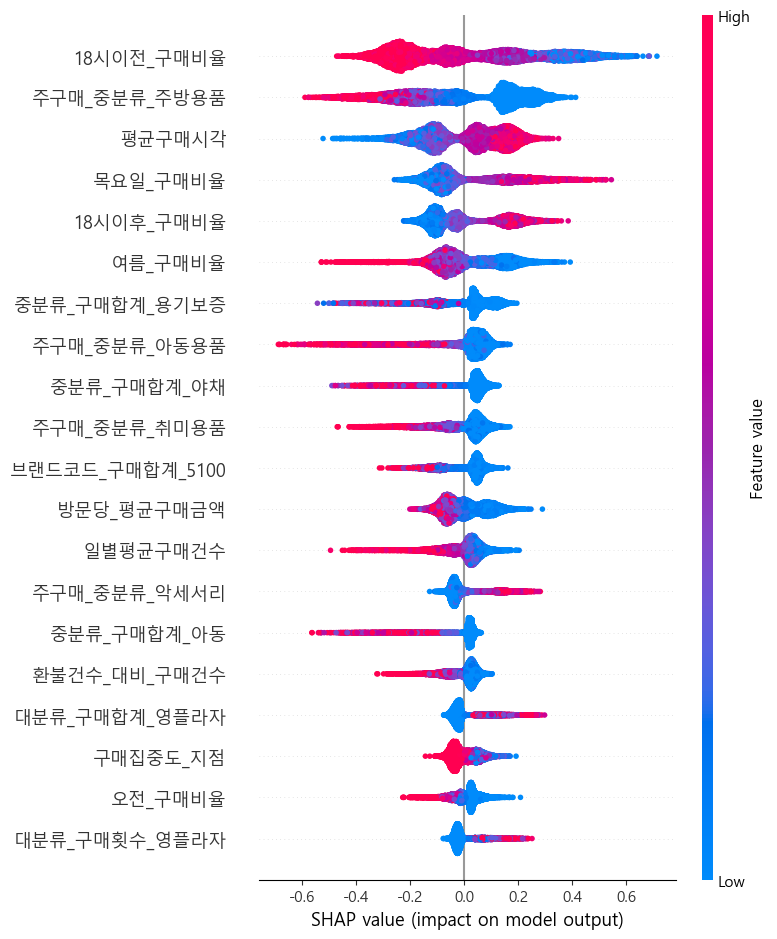

In [41]:
import shap

model = LGBMClassifier(random_state=SEED)
model.fit(train_vt, target)

explainer = shap.Explainer(model)
shap_values = explainer(train_vt)
shap.summary_plot(shap_values, train_vt)

- SelectFromModel

In [167]:
from sklearn.feature_selection import SelectFromModel

In [168]:
rf = RandomForestClassifier(random_state=SEED)

thresholds = [
    'mean', 'median',
    '0.5*mean', '1.5*mean', '2*mean',
    '0.5*median', '1.5*median', '2*median'
]

# thresholds = [f"{i}*median" for i in np.arange(1, 3.1, 0.5)]

for threshold in thresholds:
    sfm = SelectFromModel(threshold=threshold, estimator=rf)
    sfm.fit(train_vt, target)
    train_sfm = sfm.transform(train_vt)

    scores = cross_val_score(model, train_sfm, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"threshold={threshold}, 성능={np.mean(scores)}, 특성 수={train_sfm.shape[1]}")

threshold=mean, 성능=0.721878245158263, 특성 수=650
threshold=median, 성능=0.7263389172263315, 특성 수=2220
threshold=0.5*mean, 성능=0.7226965220117958, 특성 수=1087
threshold=1.5*mean, 성능=0.7213699257272033, 특성 수=442
threshold=2*mean, 성능=0.7195635096966357, 특성 수=356
threshold=0.5*median, 성능=0.7225330395343382, 특성 수=2766
threshold=1.5*median, 성능=0.7214332959446385, 특성 수=1837
threshold=2*median, 성능=0.7234814935830627, 특성 수=1598


In [169]:
sfm = SelectFromModel(rf, threshold='median')
sfm.fit(train_vt, target)
train_sfm = sfm.transform(train_vt)

scores = cross_val_score(model, train_sfm, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_sfm.shape

(0.7263389172263315, (14940, 2220))

In [46]:
feature_importance = pd.DataFrame({
    'feature': train_vt.columns,
    'score': sfm.estimator_.feature_importances_
})
feature_importance.sort_values('score', ascending=False).head(30)

,feature,score
24,18시이전_구매비율,0.015300
29,평균구매시각,0.014501
25,18시이후_구매비율,0.013395
32,저녁_구매비율,0.011512
28,주구매시간대,0.008280
4422,브랜드코드별_구매합계_std,0.007030
10,목요일_구매비율,0.006993
26,오전_구매비율,0.006881
40,주구매_중분류_주방용품,0.006769
4404,지점코드별_구매합계_std,0.006714


- SelectKBest

In [48]:
from sklearn.feature_selection import SelectKBest

In [52]:
for k in range(100, 2001, 100):
    skb = SelectKBest(k=k)
    skb.fit(train_vt, target)
    # skb.fit(train_sfm, target)
    train_skb = skb.transform(train_vt)

    scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"특성수={k}, 정확도={np.mean(scores)}")

특성수=100, 정확도=0.7052181309904508
특성수=200, 정확도=0.7125715554245091
특성수=300, 정확도=0.7137814372734732
특성수=400, 정확도=0.7136857318708675
특성수=500, 정확도=0.7165894506945258
특성수=600, 정확도=0.7191193040932928
특성수=700, 정확도=0.7176892888035564
특성수=800, 정확도=0.7170189531576139
특성수=900, 정확도=0.7195565891485849
특성수=1000, 정확도=0.720925806175394
특성수=1100, 정확도=0.7180053663212447
특성수=1200, 정확도=0.7228883472851292
특성수=1300, 정확도=0.7244517432380386
특성수=1400, 정확도=0.7210082101467403
특성수=1500, 정확도=0.7192056106176058
특성수=1600, 정확도=0.7223210293751545
특성수=1700, 정확도=0.7205539411630426
특성수=1800, 정확도=0.7216048752075281
특성수=1900, 정확도=0.7213750732050872
특성수=2000, 정확도=0.7237516922130676


In [53]:
for k in range(1210, 1400, 10):
    skb = SelectKBest(k=k)
    skb.fit(train_vt, target)
    train_skb = skb.transform(train_vt)

    scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"특성수={k}, 정확도={np.mean(scores)}")

특성수=1210, 정확도=0.7208721804121028
특성수=1220, 정확도=0.7209768417766671
특성수=1230, 정확도=0.7215555852298194
특성수=1240, 정확도=0.7200892677998303
특성수=1250, 정확도=0.7203763733748947
특성수=1260, 정확도=0.7217750969593788
특성수=1270, 정확도=0.7206091447199058
특성수=1280, 정확도=0.7205489588131833
특성수=1290, 정확도=0.7206100441196353
특성수=1300, 정확도=0.7239333261184792
특성수=1310, 정확도=0.7222727582312075
특성수=1320, 정확도=0.7219474543528731
특성수=1330, 정확도=0.7197206488579698
특성수=1340, 정확도=0.7157439048603654
특성수=1350, 정확도=0.7157439048603654
특성수=1360, 정확도=0.7166165354353179
특성수=1370, 정확도=0.7213797950014882
특성수=1380, 정확도=0.721508463781802
특성수=1390, 정확도=0.7226714100148517


In [54]:
skb = SelectKBest(k=1300)
skb.fit(train_vt, target)
train_skb = skb.transform(train_vt)

scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_skb.shape

(0.7239333261184792, (14940, 1300))

In [55]:
feature_scores = pd.DataFrame(
    {'feature': train_vt.columns,
     'score': skb.scores_}
).sort_values('score', ascending=False)

feature_scores.head(50)

,feature,score
29,평균구매시각,1420.010188
25,18시이후_구매비율,1388.950728
24,18시이전_구매비율,1388.950728
32,저녁_구매비율,1242.518730
40,주구매_중분류_주방용품,839.961756
28,주구매시간대,761.891833
31,점심_구매비율,597.480912
35,중분류_nunique,582.293480
4401,지점코드별_구매횟수_std,516.644923
45,구매건수,495.619758


- SelectPercentile

In [56]:
from sklearn.feature_selection import SelectPercentile

In [58]:
percentiles = [i for i in range(5, 101, 5)]

for percentile in percentiles:
    sp = SelectPercentile(percentile=percentile)
    # sp.fit(train_vt, target)
    sp.fit(train_sfm, target)
    train_sp = sp.transform(train_sfm)

    scores = cross_val_score(model, train_sp, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"percentile={percentile}, 성능={np.mean(scores)}, 특성 수={train_sp.shape[1]}")

percentile=5, 성능=0.7113262413376223, 특성 수=111
percentile=10, 성능=0.7163209358525559, 특성 수=222
percentile=15, 성능=0.7179617809710119, 특성 수=333
percentile=20, 성능=0.7172085677891139, 특성 수=444
percentile=25, 성능=0.7175231579399475, 특성 수=555
percentile=30, 성능=0.7213567439076519, 특성 수=666
percentile=35, 성능=0.720417913847331, 특성 수=777
percentile=40, 성능=0.7169664881723385, 특성 수=888
percentile=45, 성능=0.720925806175394, 특성 수=999
percentile=50, 성능=0.7219885971237745, 특성 수=1110
percentile=55, 성능=0.7193561033267295, 특성 수=1221
percentile=60, 성능=0.722718694535586, 특성 수=1332
percentile=65, 성능=0.7238291642677733, 특성 수=1443
percentile=70, 성능=0.7197993196971343, 특성 수=1554
percentile=75, 성능=0.725910500395662, 특성 수=1665
percentile=80, 성능=0.7190662163544704, 특성 수=1776
percentile=85, 성능=0.7237710281012779, 특성 수=1887
percentile=90, 성능=0.7218481881030614, 특성 수=1998
percentile=95, 성능=0.7197249116045064, 특성 수=2109
percentile=100, 성능=0.7263389172263315, 특성 수=2220


In [60]:
percentiles = [i for i in range(70, 80)]

for percentile in percentiles:
    sp = SelectPercentile(percentile=percentile)
    # sp.fit(train_vt, target)
    sp.fit(train_sfm, target)
    train_sp = sp.transform(train_sfm)

    scores = cross_val_score(model, train_sp, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"percentile={percentile}, 성능={np.mean(scores)}, 특성 수={train_sp.shape[1]}")

percentile=70, 성능=0.7197993196971343, 특성 수=1554
percentile=71, 성능=0.7183609560160422, 특성 수=1576
percentile=72, 성능=0.7198102091130176, 특성 수=1598
percentile=73, 성능=0.7186122134120227, 특성 수=1620
percentile=74, 성능=0.7208685756168418, 특성 수=1643
percentile=75, 성능=0.725910500395662, 특성 수=1665
percentile=76, 성능=0.7188075099592719, 특성 수=1687
percentile=77, 성능=0.7217988392879088, 특성 수=1709
percentile=78, 성능=0.7216132224877599, 특성 수=1731
percentile=79, 성능=0.721315740064956, 특성 수=1754


In [50]:
sp = SelectPercentile(percentile=75)
sp.fit(train_vt, target)
train_sp = sp.transform(train_vt)

scores = cross_val_score(model, train_sp, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_sp.shape

(0.726005735266283, (14940, 3330))

In [51]:
feature_scores = pd.DataFrame(
    {'feature': train_vt.columns,
     'score': sp.scores_}
).sort_values('score', ascending=False)

feature_scores.head(50)

,feature,score
29,평균구매시각,1420.010188
25,18시이후_구매비율,1388.950728
24,18시이전_구매비율,1388.950728
32,저녁_구매비율,1242.518730
40,주구매_중분류_주방용품,839.961756
28,주구매시간대,761.891833
31,점심_구매비율,597.480912
35,중분류_nunique,582.293480
4401,지점코드별_구매횟수_std,516.644923
45,구매건수,495.619758


- SelectKBest 에서 구한 값 근처의 값에 대해 SelectPercentile

In [3238]:
# for percentile in range(15, 25):
#     sp = SelectPercentile(percentile=percentile)
#     train_sp = sp.fit_transform(train_vt, target)

#     scores = cross_val_score(model, train_sp, target, cv=cv, scoring="f1_macro", n_jobs=-1)
#     print(f"특성비율={percentile}%, 정확도={np.mean(scores)}")

In [3239]:
# skb = SelectKBest(k=550)
# train_skb = skb.fit_transform(train_vt, target)

# scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
# np.mean(scores), train_skb.shape

- PCA

In [62]:
from sklearn.decomposition import PCA

In [966]:
pca = PCA(0.8, random_state=SEED)
pca.fit(train_vt)
pca_train = pca.transform(train_vt)

scores = cross_val_score(model, pca_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), pca_train.shape

(0.6573297312803261, (14940, 281))

- 위에서 축소한 데이터에 대해 PCA

In [70]:
pca2 = PCA(0.99, random_state=SEED)
pca2.fit(train_sfm)
pca2_train = pca2.transform(train_sfm)

scores = cross_val_score(model, pca2_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), pca2_train.shape

(0.6550209005477974, (14940, 428))

- KernelPCA

In [732]:
# from sklearn.decomposition import KernelPCA

# kpca = KernelPCA(kernel='rbf', random_state=SEED)
# kpca.fit(train_vt)
# kpca_train = kpca.transform(train_vt)

# scores = cross_val_score(model, kpca_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
# np.mean(scores), kpca_train.shape

(0.6439016087704589, (2988, 11951))

- LDA

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    pca2_train, target, test_size=0.2, random_state=SEED
)

lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_val_lda = lda.transform(X_val)

scores = cross_val_score(model, X_train_lda, y_train, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), X_train_lda.shape

(0.789614160403252, (11952, 1))

In [69]:
scores = cross_val_score(model, X_val_lda, y_val, cv=cv, scoring='f1_macro', n_jobs=-1)
np.mean(scores)

0.6562039887931007

- RFE

In [72]:
from sklearn.feature_selection import RFE

rfe = RFE(model, step=10, n_features_to_select=100, verbose=2)
rfe.fit(train_sfm, target)
train_rfe = rfe.transform(train_sfm)

scores = cross_val_score(model, train_rfe, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_rfe.shape

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127586
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 2209
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995
[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127529
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 2199
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995
[LightGB

(0.720510282219532, (14940, 1110))

In [74]:
df = pd.DataFrame({
    "Feature": train_sfm.columns[rfe.support_],
    "Importance": rfe.estimator_.feature_importances_
}).sort_values(by="Importance", ascending=False)

df.head(30)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

- RFECV

In [170]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(model, step=10, cv=cv, scoring="f1_macro", n_jobs=-1)
rfecv.fit(train_sfm, target)
train_rfecv = rfecv.transform(train_sfm)

scores = cross_val_score(model, train_rfecv, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_rfecv.shape

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127586
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 2209
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995
[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127529
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 2199
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995
[LightGB

(0.7271524169768261, (14940, 650))

In [738]:
df = pd.DataFrame({
    "Feature": train_vt.columns[rfecv.support_],
    "Importance": rfecv.estimator_.feature_importances_
}).sort_values(by="Importance", ascending=False)

df.head(50)

,Feature,Importance
19,여름_구매비율,51
35,주구매_중분류_아동용품,45
10,목요일_구매비율,41
36,주구매_중분류_취미용품,39
39,주구매_중분류_주방용품,39
23,18시이전_구매비율,38
3,일별평균구매건수,35
504,방문당_평균구매금액,33
5,평균구매요일,30
28,평균구매시각,30


- 최종적으로 모델에 넣을 학습데이터

In [171]:
# skb = SelectKBest(k=1400)
# skb.fit(X_train, y_train)
# train_ft = skb.transform(train_vt)
# test_ft = skb.transform(test_vt)
# train_ft.shape, test_ft.shape

# train_ft = rfecv.transform(train_vt) 
# test_ft = rfecv.transform(test_vt)
# train_ft.shape, test_ft.shape

train_sfm = sfm.transform(train_vt)
test_sfm = sfm.transform(test_vt)

train_ft = rfecv.transform(train_sfm)
test_ft = rfecv.transform(test_sfm)

train_ft.shape, test_ft.shape

((14940, 650), (12225, 650))

In [172]:
train_ft_df = pd.DataFrame(train_ft)
train_ft_df.to_csv(f"{DATA_PATH}selected_train.csv", index=False)
test_ft_df = pd.DataFrame(test_ft)
test_ft_df.to_csv(f"{DATA_PATH}selected_test.csv", index=False)

# 모델 선택

In [ ]:
train_ft = pd.read_csv(f"{DATA_PATH}selected_train.csv")
test_ft = pd.read_csv(f"{DATA_PATH}selected_test.csv")

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train, X_val, y_train, y_val = train_test_split(
    train_ft, target, test_size=0.2, random_state=SEED, stratify=target, shuffle=True
)

In [154]:
model = LGBMClassifier(random_state=SEED)
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
val_pred = model.predict(X_val)

f1_score(y_train, train_pred, average='macro'), f1_score(y_val, val_pred, average='macro')

(0.8766167808687981, 0.7336225244735903)

- LogisticRegression

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [291]:
params = {
    "penalty": "l1",
    "C": 0.2,
    "solver": "liblinear",
    "max_iter": 1000,
}

lr = LogisticRegression(**params, random_state=SEED)
lr.fit(X_train, y_train)
f1_score(y_train, lr.predict(X_train), average='macro'), f1_score(y_val, lr.predict(X_val), average='macro')

(0.7592750679162017, 0.7331357794854989)

In [290]:
pred_lr = lr.predict_proba(test_ft)[:, 1]
pred_lr.shape

(12225,)

- LGBMClassifier

In [292]:
params = {
    'num_leaves': 64,
    'max_depth': 15,
    'learning_rate': 0.1,
    'min_child_samples': 4,
    'colsample_bytree': 0.7,
    'subsample': 0.8,
    'subsample_freq': 4,
    'is_unbalance': True,
}

lgbm = LGBMClassifier(**params, random_state=SEED)
lgbm.fit(X_train, y_train)
f1_score(y_train, lgbm.predict(X_train), average='macro'), f1_score(y_val, lgbm.predict(X_val), average='macro')

[LightGBM] [Info] Number of positive: 4699, number of negative: 7253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 79154
[LightGBM] [Info] Number of data points in the train set: 11952, number of used features: 650
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393156 -> initscore=-0.434065
[LightGBM] [Info] Start training from score -0.434065


(0.9503911279915223, 0.7429590052270026)

In [293]:
pred_lgbm = lgbm.predict_proba(test_ft)[:, 1]
pred_lgbm.shape

(12225,)

- XGBoost

In [306]:
from xgboost import XGBClassifier

- CatBoost

In [307]:
from catboost import CatBoostClassifier

- RandomForestClassifier

In [310]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
params = {
    'n_estimators': [1000, 2000, 3000],
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier(random_state=SEED, n_jobs=-1)

rf_random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=20,
    cv=cv,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

rf_random_search.fit(train_ft, target)
print(f"최적 파라미터: {rf_random_search.best_params_}")
print(f"최고 성능 점수: {rf_random_search.best_score_}")

model = rf_random_search.best_estimator_

# 앙상블

- 스태킹

In [309]:
from sklearn.ensemble import StackingClassifier

params = {
    'estimators': [('lr', lr), ('lgbm', lgbm)],
    'final_estimator': LogisticRegression(random_state=SEED),
    'cv': cv,
    'n_jobs': -1
}

stacking = StackingClassifier(**params)

scores = cross_val_score(stacking, train_ft, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores)

0.7373352672293757

- 보팅

In [300]:
from sklearn.ensemble import VotingClassifier

params = {
    'estimators': [('lr', lr), ('lgbm', lgbm)],
    'voting': 'soft'
}

voting = VotingClassifier(**params)

scores = cross_val_score(voting, train_ft, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores)

0.7376860340015441

- 예측값 확률로 출력

In [301]:
voting.fit(train_ft, target)
pred = voting.predict(test_ft)
submit["target"] = pred

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 85077
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 650
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


# cv 점수 확인해보기

In [70]:
scores = cross_val_score(model, train_ft, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores)

0.7177806272826338

# 모델 학습

In [90]:
model = LGBMClassifier(random_state=SEED)
model.fit(train_ft, target)

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127586
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 2209
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


LGBMClassifier(random_state=42)

# 테스트 데이터 예측

In [91]:
pred = model.predict(test_ft)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [563]:
# pred = model.predict_proba(test_ft)[:,1]
# pred

# 평가를 위한 제출 파일 생성
- 예측 결과를 target 컬럼에 넣어 csv 파일로 저장후에 제출한다.

In [113]:
submit["target"] = pred
submit

,ID,target
0,test_0,0.0
1,test_1,1.0
2,test_2,0.0
3,test_3,1.0
4,test_4,1.0
...,...,...
12220,test_12220,1.0
12221,test_12221,0.0
12222,test_12222,0.0
12223,test_12223,0.0


- 예측 결과를 csv 파일로 저장하여 제출

In [302]:
submit.to_csv(f"{DATA_PATH}submit.csv",index=False)